### Introduction

In [1]:
import tensorflow as tf
tf.__version__

'2.11.0'

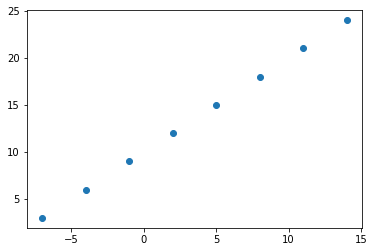

In [2]:
# creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualing
plt.scatter(X, y)

In [3]:
# demo tensor for housing prices prediction
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [4]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [5]:
# turning NumPy arrays to tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [6]:
# modelling with TensorFlow
tf.random.set_seed(42)

# model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# model compilation
model.compile(
    loss = tf.keras.losses.mae, # mae - mean absolue error
    optimizer=tf.keras.optimizers.SGD(), # sgd - stochastic gradient descent
    metrics=["mae"]
)

# model fitting
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # output was pretty close with epochs=1000

Epoch 1/5
1/1 [==============================] - 0s 314ms/step - loss: 22.0634 - mae: 22.0634
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 21.6703 - mae: 21.6703
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 21.2771 - mae: 21.2771
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 20.8840 - mae: 20.8840
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 20.5057 - mae: 20.5057


In [7]:
# prediction with model
model.predict([17.0])

1/1 [==============================] - 0s 87ms/step


array([[-24.242407]], dtype=float32)

In [8]:
# improving model

#increasing epochs
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 253ms/step - loss: 13.2454 - mae: 13.2454
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 13.1129 - mae: 13.1129
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 12.9804 - mae: 12.9804
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 12.8479 - mae: 12.8479
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 12.7154 - mae: 12.7154
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 12.5829 - mae: 12.5829
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 12.4504 - mae: 12.4504
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 12.3179 - mae: 12.3179
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 12.1854 - mae: 12.1854
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 12.0529 - mae: 12.0529
Epoch 11/100
1/1 [==============================] - 0s 4m

In [9]:
model.predict([17.0])

1/1 [==============================] - 0s 60ms/step


array([[29.471518]], dtype=float32)

In [10]:
# changing optimizer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.05),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 335ms/step - loss: 15.6694 - mae: 15.6694
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 15.6634 - mae: 15.6634
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 15.6574 - mae: 15.6574
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 15.6514 - mae: 15.6514
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 15.6454 - mae: 15.6454
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 15.6394 - mae: 15.6394
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 15.6334 - mae: 15.6334
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 15.6274 - mae: 15.6274
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 15.6214 - mae: 15.6214
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 15.6154 - mae: 15.6154
Epoch 11/100
1/1 [==============================] - 0s 6m

In [11]:
model.predict([17.0])

1/1 [==============================] - 0s 61ms/step


array([[-7.6531816]], dtype=float32)

In [12]:
# adding extra layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.005),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 486ms/step - loss: 13.9065 - mae: 13.9065
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.8212 - mae: 13.8212
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 13.7360 - mae: 13.7360
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 13.6510 - mae: 13.6510
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 13.5662 - mae: 13.5662
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 13.4816 - mae: 13.4816
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3973 - mae: 13.3973
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 13.3135 - mae: 13.3135
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 13.2303 - mae: 13.2303
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 13.1476 - mae: 13.1476
Epoch 11/100
1/1 [==============================] - 0s 4m

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 80ms/step


array([[22.101578]], dtype=float32)

### Bigger Data Sets

In [14]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [15]:
# labels for X
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

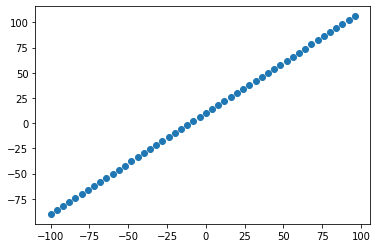

In [16]:
plt.scatter(X, y)

In [17]:
# creating 80-20 train/test sets
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

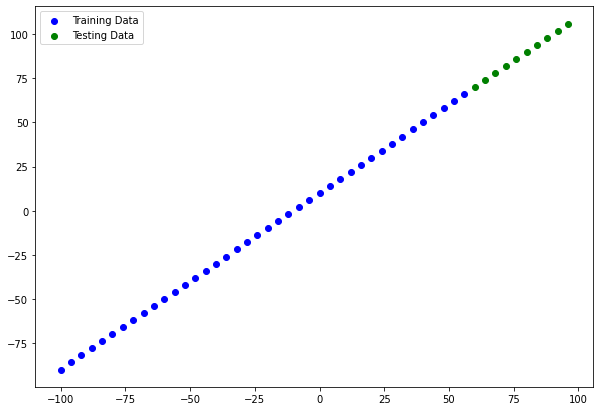

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Testing Data")
plt.legend()

In [19]:
# creating neural network
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [20]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 50ms/step


array([[ 71.3598 ],
       [ 75.49809],
       [ 79.63665],
       [ 83.77521],
       [ 87.91377],
       [ 92.05235],
       [ 96.1909 ],
       [100.32947],
       [104.46803],
       [108.60659]], dtype=float32)

In [21]:
# real values
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [22]:
from tensorflow.keras.utils import plot_model

In [23]:
plot_model(model=model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [24]:
# visualising predictions (plotting function)
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
  """
  Plots training data, test data and compares predictions with ground truth variables
  """

  plt.figure(figsize=(10, 7))
  # train data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  # test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")
  # model predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  plt.legend()

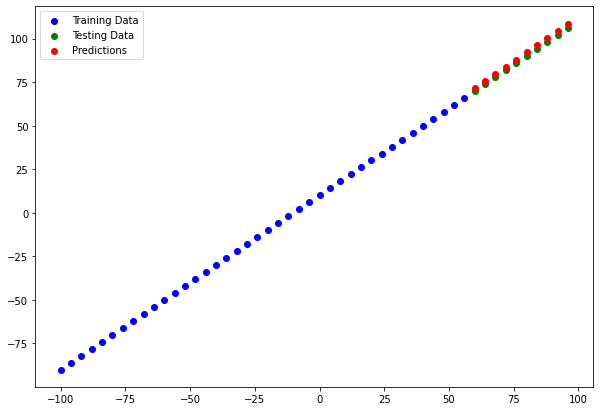

In [25]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [26]:
# evaluating model predictions
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 126ms/step - loss: 1.9831 - mae: 1.9831


[1.983086347579956, 1.983086347579956]

In [27]:
# mean absolute error with y_pred
mae = tf.keras.losses.mae(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.9830872>

In [28]:
# mean squared error
mse = tf.keras.losses.mse(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=4.090998>

In [29]:
# mae function
def mae(y_true, y_pred):
  return tf.keras.losses.mae(y_true, tf.squeeze(y_pred))

#mse function
def mse(y_true, y_pred):
  return tf.keras.losses.mse(y_true, tf.squeeze(y_pred))

### Experiments to improve model

In [30]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

In [31]:
# 1 layer, 100 epochs
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 42ms/step
MAE =  tf.Tensor(18.6787, shape=(), dtype=float32)
MSE =  tf.Tensor(351.06122, shape=(), dtype=float32)


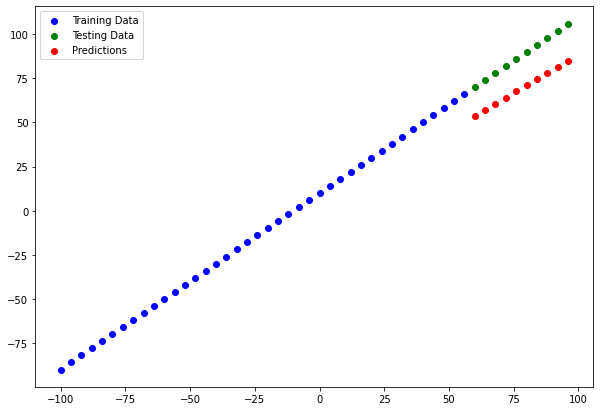

In [32]:
y_pred = model_1.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_pred)
mae_1 = mae(y_test, y_pred)
mse_1 = mse(y_test, y_pred)
print("MAE = ", mae_1)
print("MSE = ", mse_1)
# pretty bad predictions

In [33]:
# 2 layers, 100 epochs, MSE
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 53ms/step
MAE =  tf.Tensor(42.880634, shape=(), dtype=float32)
MSE =  tf.Tensor(1864.2946, shape=(), dtype=float32)


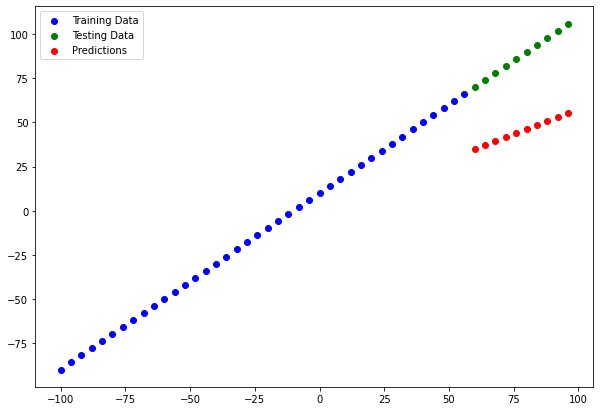

In [34]:
y_pred = model_2.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_pred)
mae_2 = mae(y_test, y_pred)
mse_2 = mse(y_test, y_pred)
print("MAE = ", mae_2)
print("MSE = ", mse_2)
# much better mae and mse values, red also a lot on the green

In [35]:
# 2 epochs, 500 epochs
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 46ms/step
MAE =  tf.Tensor(68.00866, shape=(), dtype=float32)
MSE =  tf.Tensor(4709.7646, shape=(), dtype=float32)


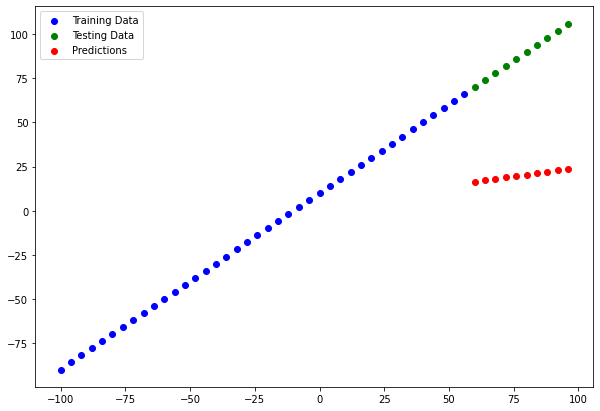

In [36]:
y_pred = model_3.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_pred)
mae_3 = mae(y_test, y_pred)
mse_3 = mse(y_test, y_pred)
print("MAE = ", mae_3)
print("MSE = ", mse_3)
# training maybe happened for too long

In [37]:
# 2 epochs, 500 epochs, Adam lr=0.01
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 47ms/step
MAE =  tf.Tensor(0.8548126, shape=(), dtype=float32)
MSE =  tf.Tensor(0.74283236, shape=(), dtype=float32)


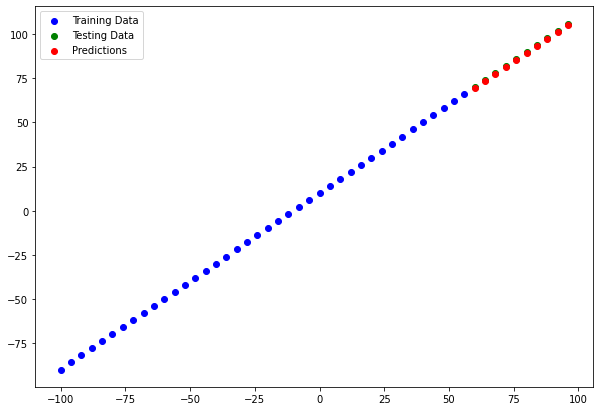

In [38]:
y_pred = model_4.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_pred)
mae_4 = mae(y_test, y_pred)
mse_4 = mse(y_test, y_pred)
print("MAE = ", mae_4)
print("MSE = ", mse_4)
# extremely good predictions with Adam over SGD, green is not visible (extremely good predictions)

In [39]:
# comparing models with Pandas Dataframe visualisation
import pandas as pd

In [40]:
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()],
                 ["model_4", mae_4.numpy(), mse_4.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "MAE", "MSE"])
all_results

,model,MAE,MSE
0,model_1,18.678699,351.061218
1,model_2,42.880634,1864.294556
2,model_3,68.008659,4709.764648
3,model_4,0.854813,0.742832


In [41]:
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Saving and Loading Models

In [42]:
# SavedModel format
model_4.save("bestmodel_SavedModel")

INFO:tensorflow:Assets written to: bestmodel_SavedModel\assets


INFO:tensorflow:Assets written to: bestmodel_SavedModel\assets


In [43]:
# HDF5 format
model_4.save("bestmodel_HDF5.h5")

In [44]:
# SavedModel loading
load_model = tf.keras.models.load_model("bestmodel_SavedModel")
load_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [45]:
# comparing model_4 with saved model
load_pred = load_model.predict(X_test)
y_pred = model_4.predict(X_test)
load_pred == y_pred

1/1 [==============================] - 0s 19ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [46]:
# HDF5 loading
load_model_2 = tf.keras.models.load_model("bestmodel_HDF5.h5")
load_model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### A Larger example

In [47]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [49]:
# need to convert strings/objects to numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [50]:
# creating X, y
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [51]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [52]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [54]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.fit(X_train, y_train, epochs=100, verbose=0)

In [55]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7282.3003 - mae: 7282.3003


[7282.30029296875, 7282.30029296875]

In [56]:
# adding extra layer and changing optimizer
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [57]:
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4887.1235 - mae: 4887.1235


[4887.12353515625, 4887.12353515625]

In [58]:
# increasing run time
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

history = model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [59]:
model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3496.0515 - mae: 3496.0515


[3496.051513671875, 3496.051513671875]

Text(0.5, 0, 'epochs')

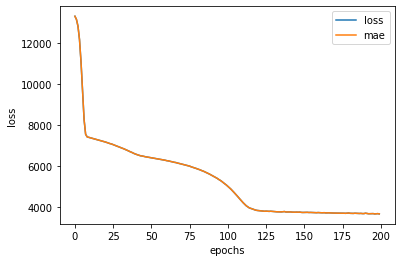

In [60]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing Data with Normalisation

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [62]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# creating column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fitting column transformer to training data
ct.fit(X_train)

# transform train and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [63]:
X_train_normal, X_test_normal

(array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
         1.        ],
        [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
         1.        ]]),
 array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
         0.        ],
        [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
         0.        ],
        [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
         0.        ],
        ...,
        [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
         0.        ],
        [0.7

In [64]:
# converting array to tensor
X_train_normal = tf.constant(X_train_normal)
X_test_normal = tf.constant(X_test_normal)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [65]:
# building model to fit normalised data
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

model_1.fit(X_train_normal, y_train, epochs=300, verbose=0)

In [66]:
model_1.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3161.2170 - mae: 3161.2170


[3161.217041015625, 3161.217041015625]